In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import isomorphism as iso
from itertools import combinations

def build_graph(doc):
    # preprocess document for standardization
    pdoc = preprocess_document(doc)
    print(pdoc)
    # get graph nodes
    nodes = get_entities(pdoc)

    # get graph edges
    edges = get_relations(pdoc)

    # create graph structure with NetworkX
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    return G


def build_weighted_digraph(document):
    # preprocess document for standardization
    pdoc = preprocess_document(document)

    # get graph nodes
    nodes = get_entities(pdoc)

    # get weighted edges
    weighted_edges = get_weighted_edges(pdoc)

    # create graph structure with NetworkX
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_weighted_edges_from(weighted_edges)

    return G

def preprocess_document(document, sentence_spliter='.', word_spliter=' ', punct_mark=','):
    # lowercase all words and remove trailing whitespaces
    document = document.lower().strip()

    # remove unwanted punctuation marks
    for pm in punct_mark:
        document = document.replace(pm, '')

    # get list of sentences which are non-empty
    sentences = [sent for sent in document.split(
        sentence_spliter) if sent != '']

    # get list of sentences which are lists of words
    document = []
    for sent in sentences:
        words = sent.strip().split(word_spliter)
        document.append(words)

    return document


def get_entities(document):
    # in our case, entities are all unique words
    unique_words = []
    for sent in document:
        for word in sent:
            if word not in unique_words:
                unique_words.append((word,{"values":word}))
    return unique_words


def get_relations(document):
    # in our case, relations are bigrams in sentences
    bigrams = []
    for sent in document:
        for i in range(len(sent)-1):
            # for every word and the next in the sentence
            pair = [sent[i], sent[i+1]]
            # only add unique bigrams
            if pair not in bigrams:
                bigrams.append(pair)
    return bigrams


def plot_graph(G, title=None):
    # set figure size
    plt.figure(figsize=(10, 10))

    # define position of nodes in figure
    pos = nx.nx_agraph.graphviz_layout(G)

    # draw nodes and edges
    nx.draw(G, pos=pos, with_labels=True)

    # get edge labels (if any)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # draw edge labels (if any)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # plot the title (if any)
    plt.title(title)

    plt.show()
    return


def get_weighted_edges(document):
    # in our case, relations are bigrams in sentences
    # weights are number of equal bigrams
    # use a dict to store number of counts
    bigrams = {}
    for sent in document:
        for i in range(len(sent)-1):

            # transform to hashable key in dict
            pair = str([sent[i], sent[i+1]])

            if pair not in bigrams.keys():
                # weight = 1
                bigrams[pair] = 1
            else:
                # already exists, weight + 1
                bigrams[pair] += 1

    # convert to NetworkX standard form each edge connecting nodes u and v = [u, v, weight]
    weighted_edges_format = []
    for pair, weight in bigrams.items():
        # revert back from hashable format
        w1, w2 = eval(pair)
        weighted_edges_format.append([w1, w2, weight])

    return weighted_edges_format


[['deep', 'reinforcement', 'learning', '(deep', 'rl)', 'is', 'a', 'subfield', 'of', 'machine', 'learning', 'that', 'combines', 'reinforcement', 'learning', '(rl)', 'and', 'deep', 'learning'], ['rl', 'considers', 'the', 'problem', 'of', 'a', 'computational', 'agent', 'learning', 'to', 'make', 'decisions', 'by', 'trial', 'and', 'error']]


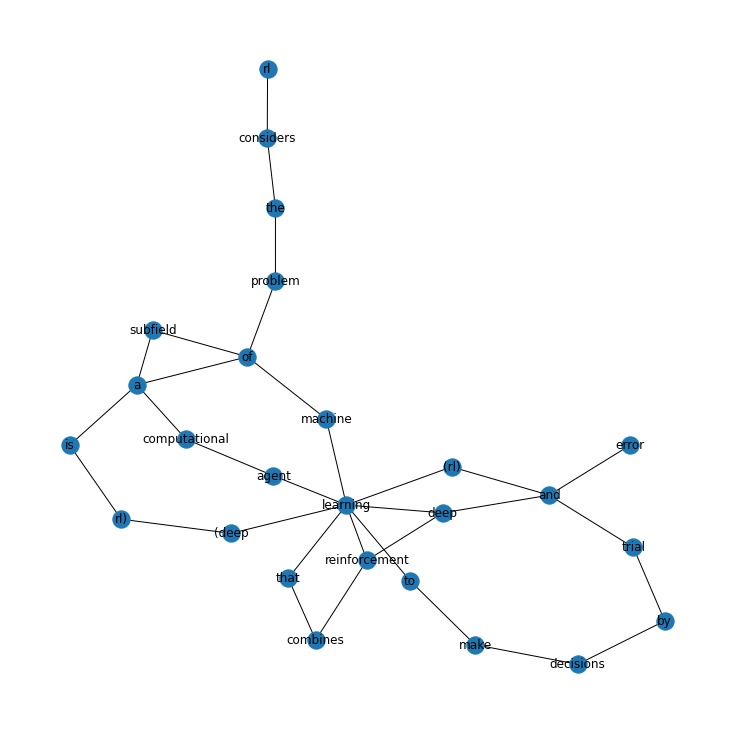

[['deep', 'learning', 'is', 'a', 'form', 'of', 'machine', 'learning', 'that', 'utilizes', 'a', 'neural', 'network', 'to', 'transform', 'a', 'set', 'of', 'inputs', 'into', 'a', 'set', 'of', 'outputs', 'via', 'an', 'artificial', 'neural', 'network'], ['deep', 'learning', 'methods', 'often', 'using', 'supervised', 'learning', 'with', 'labeled', 'datasets']]


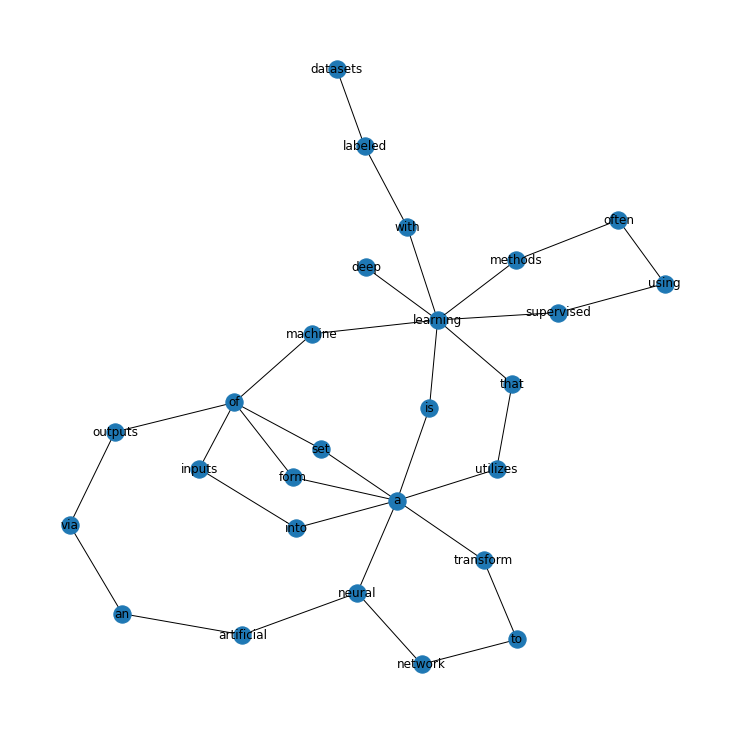

[['machine', 'learning', 'is', 'a', 'branch', 'of', 'artificial', 'intelligence', '(ai)', 'and', 'computer', 'science', 'which', 'focuses', 'on', 'the', 'use', 'of', 'data', 'and', 'algorithms', 'to', 'imitate', 'the', 'way', 'that', 'humans', 'learn', 'gradually', 'improving', 'its', 'accuracy']]


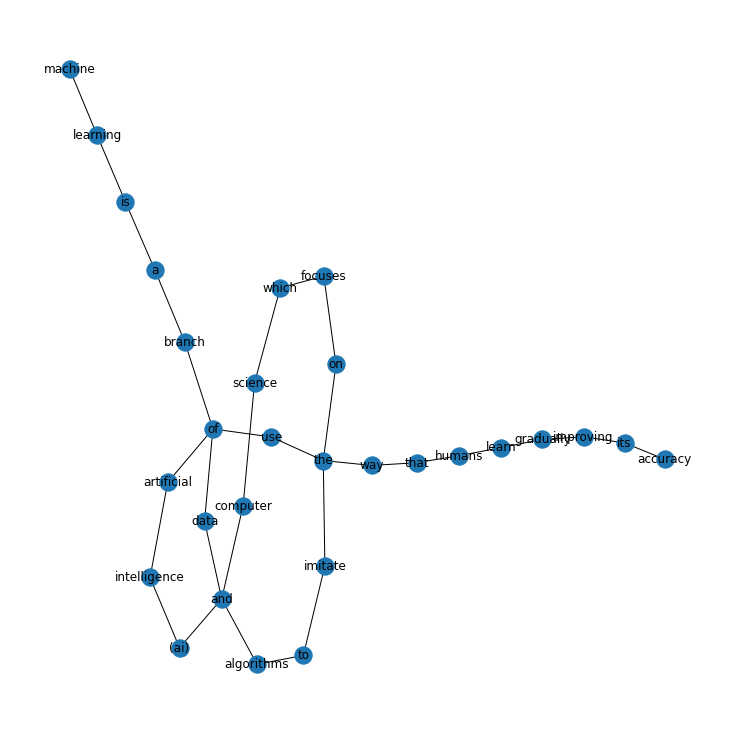

Câu truy vấn:
[['what', 'is', 'deep', 'reinforcement', 'learning?']]


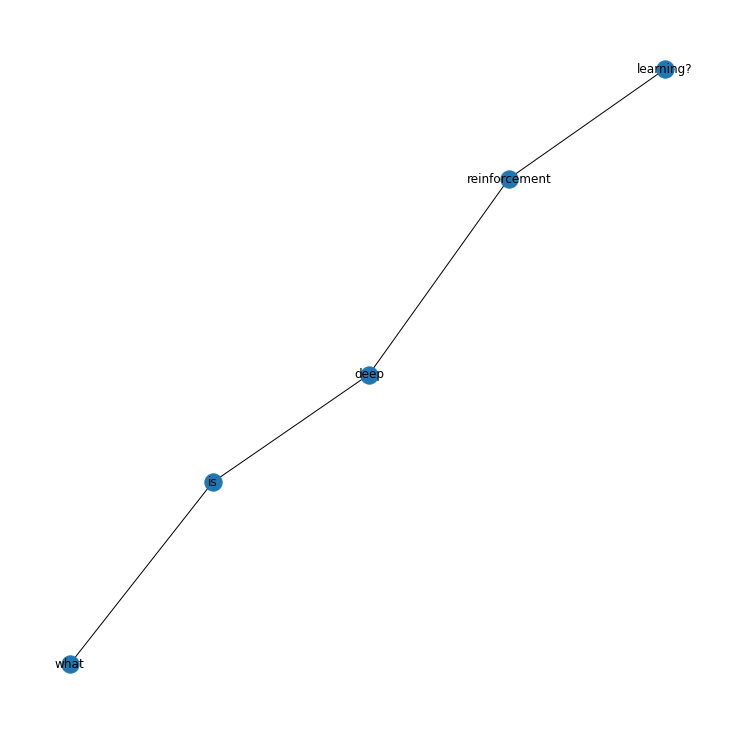

In [157]:
def content1():
    """
    Deep reinforcement learning (deep RL) is a subfield of machine learning that combines reinforcement learning (RL) and deep learning. RL considers the problem of a computational agent learning to make decisions by trial and error.
    """
    return 0

G1 = build_graph(content1.__doc__)
plot_graph(G1)
def content2():
    """
    Deep learning is a form of machine learning that utilizes a neural network to transform a set of inputs into a set of outputs via an artificial neural network. Deep learning methods, often using supervised learning with labeled datasets.
    """
    return 0

G2 = build_graph(content2.__doc__)
plot_graph(G2)

def content3():
    """
    Machine learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy.
    """
    return 0

G3 = build_graph(content3.__doc__)
plot_graph(G3)

print("Câu truy vấn:")
def content4():
    """
    What is deep reinforcement learning?
    """
    return 0
G4 = build_graph(content4.__doc__)
plot_graph(G4)    
# GM = nx.algorithms.isomorphism.GraphMatcher(G1, G2)
# for subgraph in GM.subgraph_isomorphisms_iter():
#     plot_graph(subgraph)


#GREEDY ALGORITHM

In [150]:
def getMCS(g1, g2):
    matching_graph = nx.Graph()

    for n1, n2 in g2.edges():
        if g1.has_edge(n1, n2):
            matching_graph.add_edge(n1, n2)

    # plot_graph(matching_graph)
    if (len(matching_graph)==0):
        for n in g2.nodes():
            if g1.has_node(n):
                matching_graph.add_node(n)
                return matching_graph
    else:
        # components = nx.connected_components(matching_graph)
        # try:
        # largest_component = max(components, key=len)
        return matching_graph
    # except:
    #     return None
        
def Greedy(g1,g2):
    # getMCS(g1,g2)
    largest_common_subgraph = list(getMCS(g1, g2).nodes)
    # print(largest_common_subgraph)
    common_word = []  # create empty list
    for val in largest_common_subgraph:
            if val in common_word:
                continue
            else:
                common_word.append(val)

    # print(common_word)

    color_map = []
    for node in g1:


        if node in common_word:
            color_map.append('red')
        else:
            color_map.append('blue')

    plt.figure(figsize=(10, 10))

    # define position of nodes in figure
    pos = nx.nx_agraph.graphviz_layout(g1)
    nx.draw(g1, pos=pos, node_color=color_map, with_labels=True)
    plt.show


Câu truy vấn:


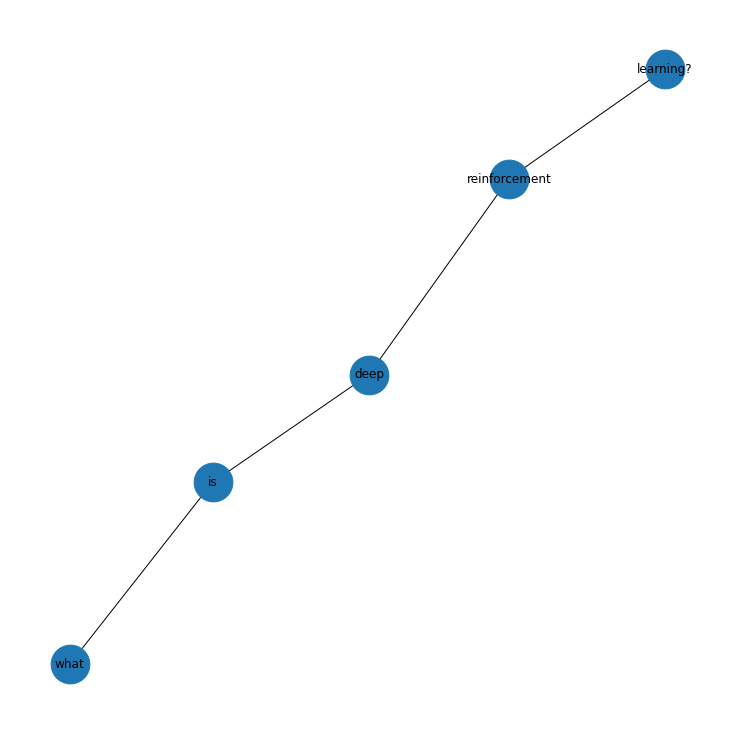

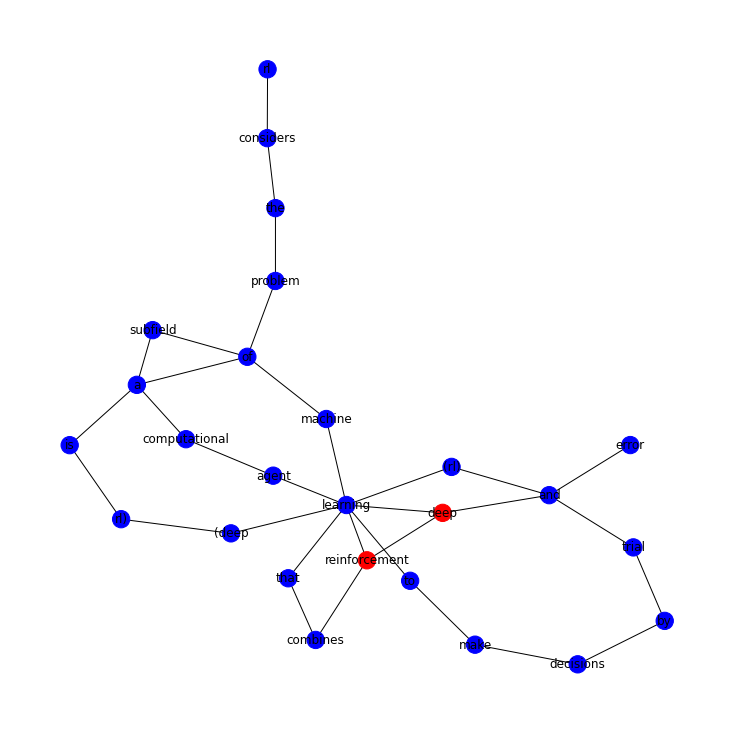

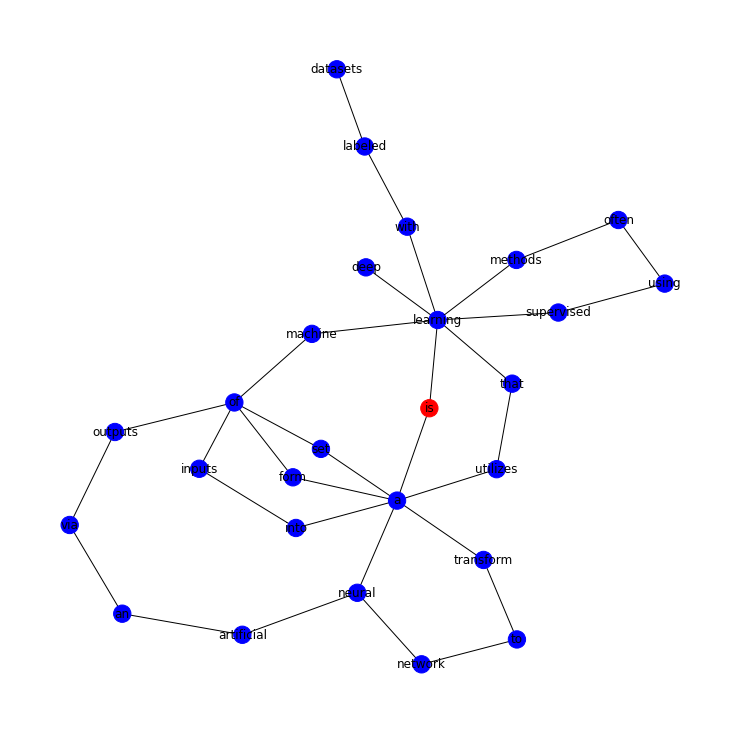

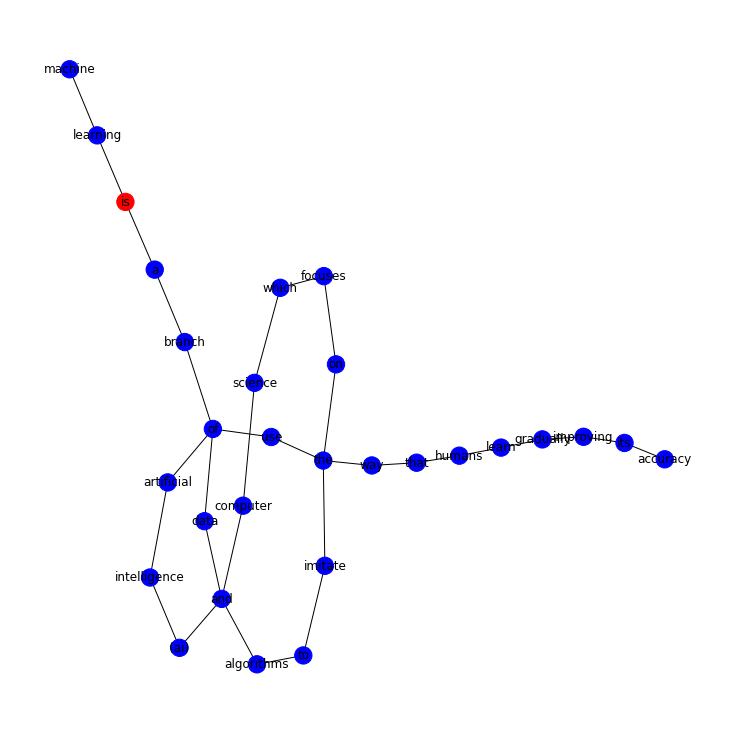

In [151]:
print("Câu truy vấn:")
plot_graph(G4)
for g in [G1,G2,G3]:
    Greedy(g,G4)


VF2 ALGORITHM

In [152]:
def sub_lists(my_list):
    subs = []
    for i in range(0, len(my_list)+1):
        temp = [list(x) for x in combinations(my_list, i)]
        if len(temp) > 0:
            subs.extend(temp)
    return subs

def vf2(G1,G4):
    sub_list = sub_lists(G4.nodes)[::-1]
    # print(sub_list)
    max = 0
    largest_common_subgraph = []
    for i in range(len(sub_list)):
        if (len(sub_list[i]) < max):
            break
        GM = nx.algorithms.isomorphism.GraphMatcher(
            G1, G4.subgraph(sub_list[i]), node_match=iso.categorical_node_match('values', -1))
        if(GM.subgraph_is_isomorphic()):
            max = len(sub_list[i])
            largest_common_subgraph.append(sub_list[i])
    #find all common nodes  
    common_word = []  # create empty list
    for dict in largest_common_subgraph:
        for val in dict:
            if val in common_word:
                continue
            else:
                common_word.append(val)

    print(common_word)
    #color_node
    color_map = []
    for node in G1:

        if node in largest_common_subgraph[0]:
            color_map.append('red')
        else:
            color_map.append('blue')

    plt.figure(figsize=(10, 10))

    # define position of nodes in figure
    pos = nx.nx_agraph.graphviz_layout(G1)
    nx.draw(G1, pos=pos, node_color=color_map, with_labels=True)
    plt.show


Câu truy vấn:


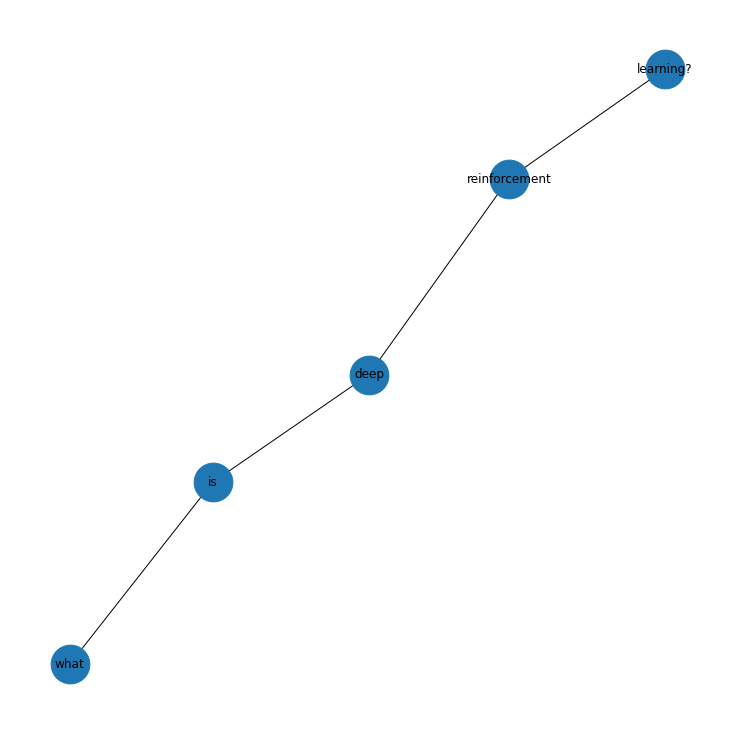

['deep', 'reinforcement', 'is']
['deep', 'is']
['is']


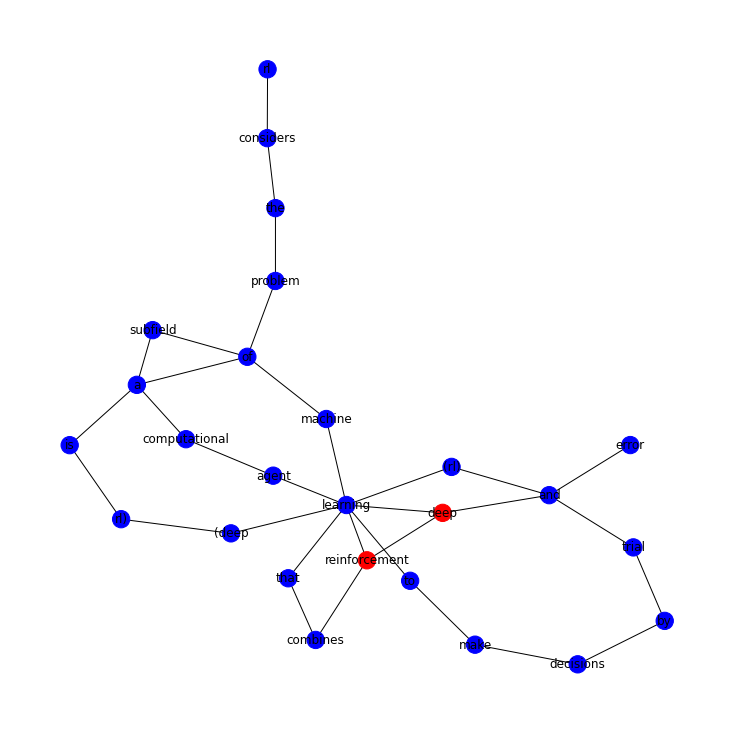

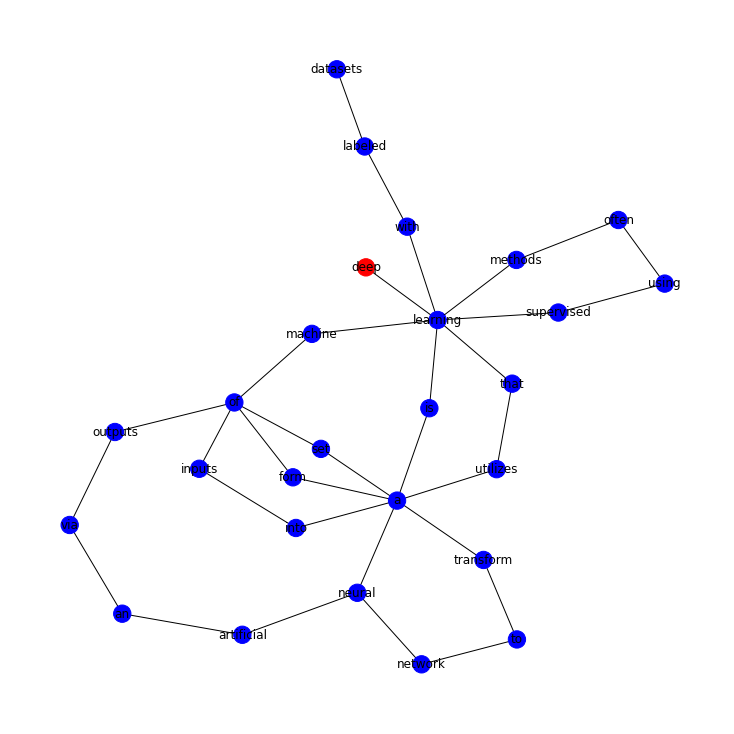

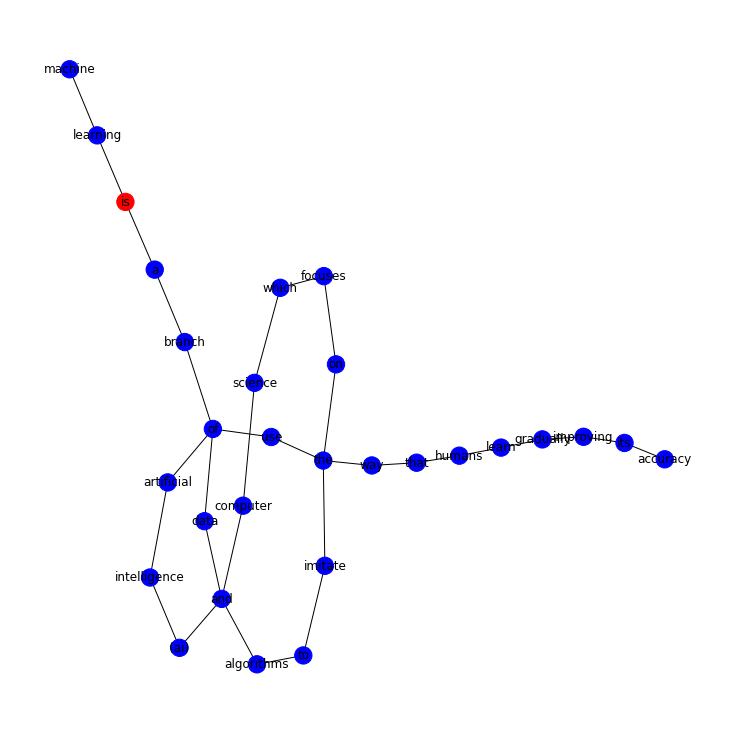

In [153]:
print("Câu truy vấn:")
plot_graph(G4)
for g in [G1,G2,G3]:
    vf2(g,G4)

#ISMAGS ALGORITHM

In [154]:
def ismags(G1,G4):
    GM = iso.ISMAGS(
        G1, G4, node_match=iso.categorical_node_match('values', -1))
    # print(list(GM.subgraph_isomorphisms_iter()))
    largest_common_subgraph = list(GM.largest_common_subgraph())
    print(largest_common_subgraph)
    # common_word = []  # create empty list
    # for dict in largest_common_subgraph:
    #     for val in dict.values():
    #         if val in common_word:
    #             continue
    #         else:
    #             common_word.append(val)

    # print(common_word)

    color_map = []
    for node in G1:

        if node in largest_common_subgraph[0]:
            color_map.append('red')
        else:
            color_map.append('blue')

    plt.figure(figsize=(10, 10))

    # define position of nodes in figure
    pos = nx.nx_agraph.graphviz_layout(G1)
    nx.draw(G1, pos=pos, node_color=color_map, with_labels=True)
    plt.show


Câu truy vấn:


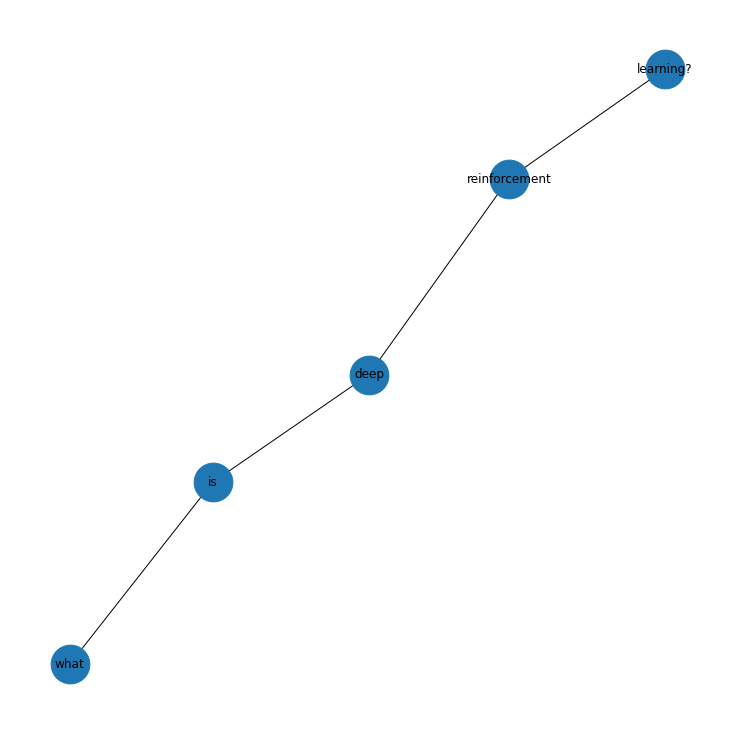

[{'deep': 'deep', 'reinforcement': 'reinforcement'}, {'reinforcement': 'reinforcement', 'is': 'is'}]
[{'deep': 'deep'}, {'is': 'is'}]
[{'is': 'is'}]


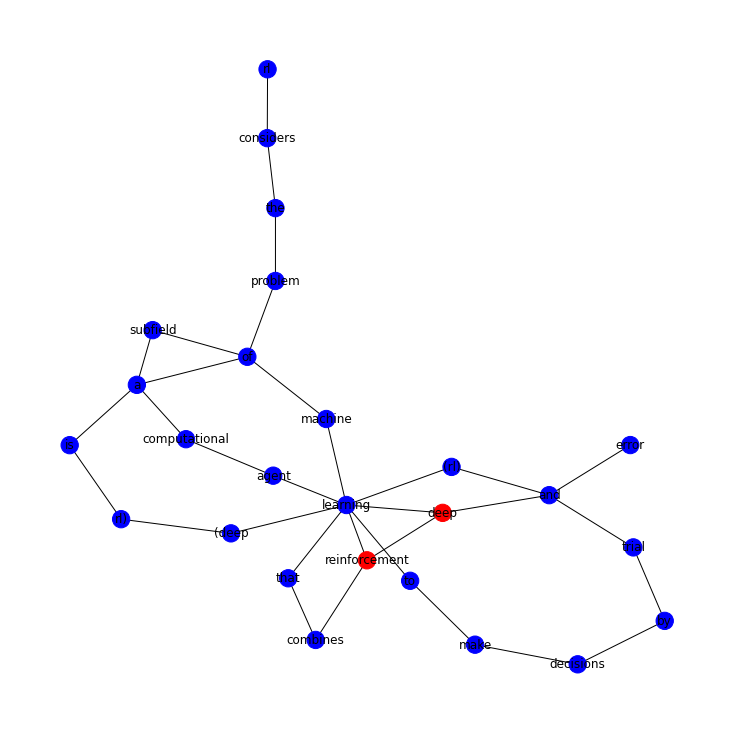

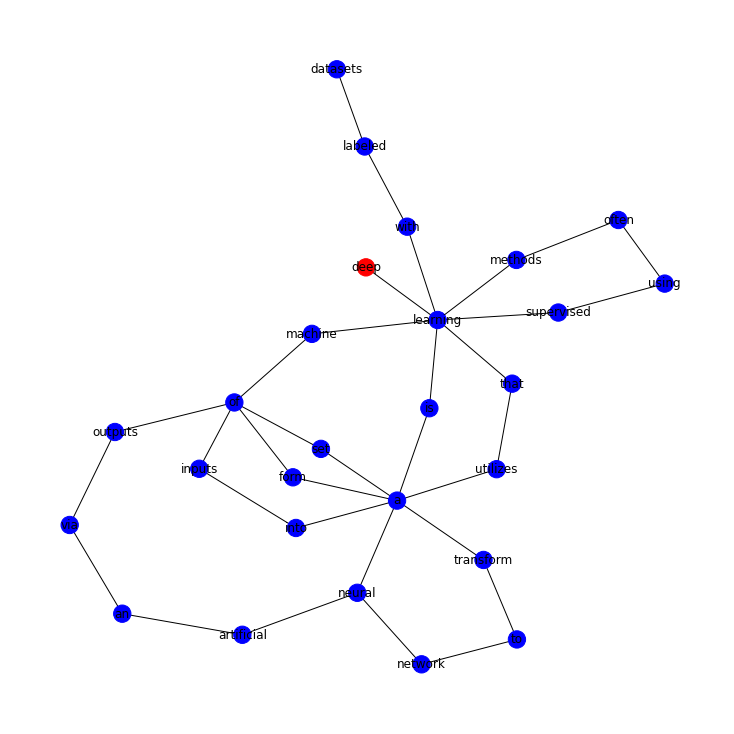

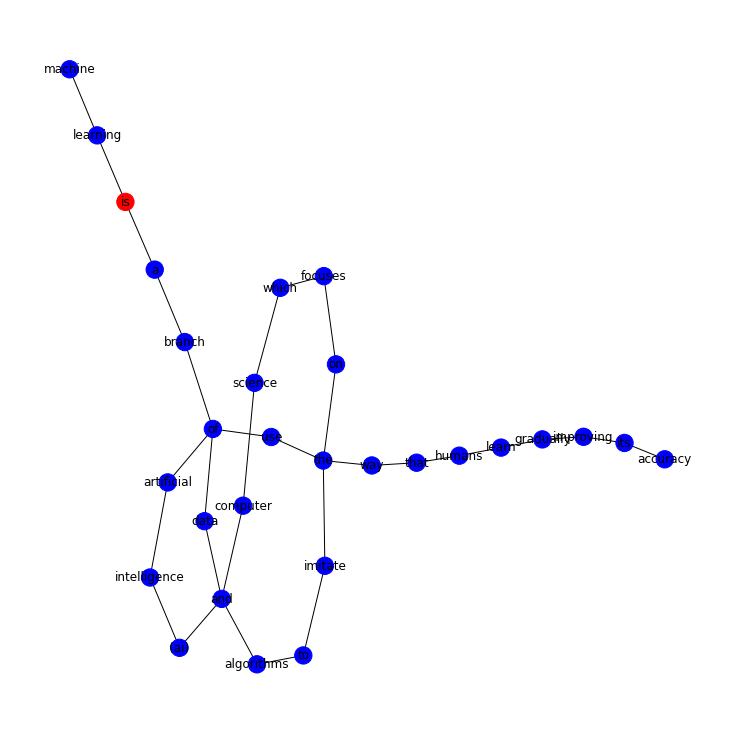

In [155]:
print("Câu truy vấn:")
plot_graph(G4)
for g in [G1,G2,G3]:
    ismags(g,G4)